In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create blobs
k = 6
data = make_blobs(n_samples=200, n_features=2, centers=k, cluster_std=2., random_state=50)
x = data[0]

(-15, 15)

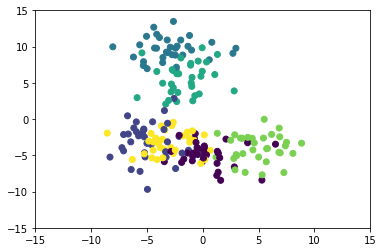

In [2]:
# Plot data
plt.scatter(x[:,0], x[:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [7]:
import numpy as np
def Kmean(x, k, maxiter=100, seed=None, store_path=False):
C = np.zeros((k, x.shape[1]))  # Centroids
    L = np.zeros(x.shape[0], dtype=np.int)  # Labels
    
    # Initialize random centroids
    np.random.seed(seed)
    ri = np.random.choice(np.arange(x.shape[0]), size=k, replace=False)  # Random index
    C = x[ri, :]
    
    # Update initial labels
    for jj, xi in enumerate(x):
        dist = np.linalg.norm(C-xi, axis=1)
        am = np.argmin(dist)
        L[jj] = am

    def updateCentroids():
        for ii, ci in enumerate(C):
            # Get parts which belongs to centroid
            xi = x[L==ii, :]
            # Update centroid
            C[ii] = np.mean(xi, axis=0)
    
    # Run main loop
    changed = True
    it = 0
    images = [(C.copy(), L.copy())]
    while changed is True and it < maxiter:
        changed = False
        updateCentroids()
        
        # Update labels, and see if any changed
        for ii, xi in enumerate(x):
            dist = np.linalg.norm(C-xi, axis=1)
            minDist = np.argmin(dist)
            if not minDist == L[ii]:
                L[ii] = minDist
                changed = True
        
        if changed:
            it += 1
            if store_path:
                # Here we could store intermediate images
                images.append((C.copy(), L.copy()))
    if not changed:
        print('Converged in {} iterations'.format(it))
    else:
        print('Warning - calculation did not converge in {} iterations!'.format(it))
    images.append((C.copy(), L.copy()))
    return images

In [4]:
images = Kmean(x, k, 1000, seed=44, store_path=True)

Converged in 5 iterations


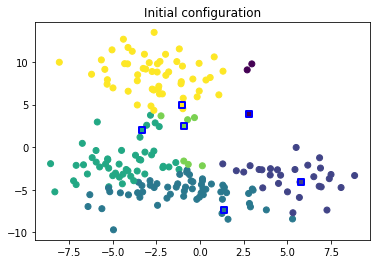

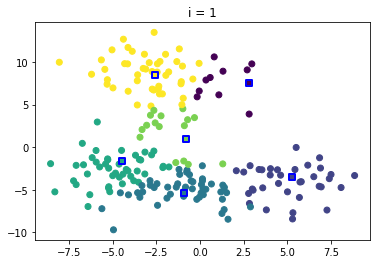

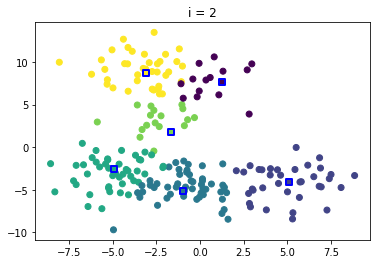

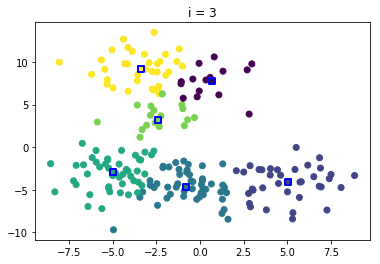

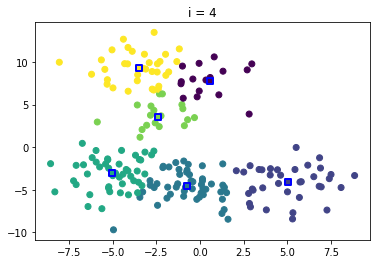

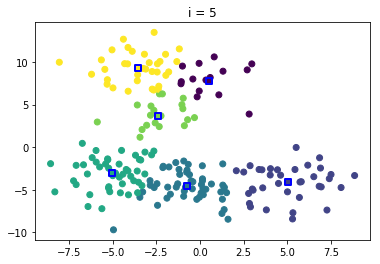

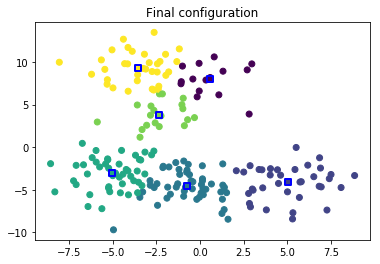

In [8]:
%matplotlib inline

for i, (C, L) in enumerate(images):
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=L, cmap='viridis')
    plt.scatter(C[:, 0], C[:, 1], c=range(len(C)), edgecolor='b', marker='s', linewidth=2)
    if i == 0:
        plt.title('Initial configuration')
    elif i == len(images) - 1:
        plt.title('Final configuration')
    else:
        plt.title('i = {}'.format(i))
    plt.show()
    plt.close()